In [1]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.layers import Dense,TimeDistributed, Dropout
from keras.models import Sequential
from keras.layers import LSTM
from keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
tf.config.experimental.set_visible_devices([], 'GPU')

Using TensorFlow backend.


In [2]:
X=np.load('load_data.npy')
y=np.load('label.npy')
# y=keras.utils.to_categorical(y, num_classes=2, dtype='float32')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [3]:
hidden_nodes = int(2/3 * (X_train.shape[1]))

In [4]:
model = Sequential()
model.add(LSTM(4, return_sequences=True,input_shape=(X_train.shape[1],X_train.shape[2])))
model.add(Dropout(0.2))
model.add(TimeDistributed(Dense(y_train.shape[2],activation='sigmoid'), input_shape=(X_train.shape[1],X_train.shape[2])))
model.add(Dropout(0.2))
adam=keras.optimizers.Adam(learning_rate=0.05, beta_1=0.9, beta_2=0.999, amsgrad=True)
model.compile(loss='binary_crossentropy', optimizer=adam,metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 5576, 4)           160       
_________________________________________________________________
dropout_1 (Dropout)          (None, 5576, 4)           0         
_________________________________________________________________
time_distributed_1 (TimeDist (None, 5576, 1)           5         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5576, 1)           0         
Total params: 165
Trainable params: 165
Non-trainable params: 0
_________________________________________________________________


In [5]:
history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_test, y_test), verbose=2, shuffle=False)

Train on 12 samples, validate on 3 samples
Epoch 1/100
 - 9s - loss: 2.0417 - accuracy: 0.4752 - val_loss: 0.6665 - val_accuracy: 0.7658
Epoch 2/100
 - 7s - loss: 2.0214 - accuracy: 0.4728 - val_loss: 0.6442 - val_accuracy: 0.7473
Epoch 3/100
 - 8s - loss: 1.9912 - accuracy: 0.4725 - val_loss: 0.6131 - val_accuracy: 0.7308
Epoch 4/100
 - 7s - loss: 1.9570 - accuracy: 0.6197 - val_loss: 0.5717 - val_accuracy: 0.7279
Epoch 5/100
 - 9s - loss: 1.9220 - accuracy: 0.7163 - val_loss: 0.5345 - val_accuracy: 0.7260
Epoch 6/100
 - 8s - loss: 1.8967 - accuracy: 0.7131 - val_loss: 0.5129 - val_accuracy: 0.7301
Epoch 7/100
 - 9s - loss: 1.8696 - accuracy: 0.7052 - val_loss: 0.4937 - val_accuracy: 0.7373
Epoch 8/100
 - 9s - loss: 1.8812 - accuracy: 0.6981 - val_loss: 0.4684 - val_accuracy: 0.7484
Epoch 9/100
 - 9s - loss: 1.8645 - accuracy: 0.7073 - val_loss: 0.4455 - val_accuracy: 0.7615
Epoch 10/100
 - 8s - loss: 1.8257 - accuracy: 0.7177 - val_loss: 0.4290 - val_accuracy: 0.7692
Epoch 11/100
 - 

Epoch 87/100
 - 9s - loss: 1.7469 - accuracy: 0.7554 - val_loss: 0.3566 - val_accuracy: 0.8487
Epoch 88/100
 - 8s - loss: 1.7606 - accuracy: 0.7566 - val_loss: 0.3563 - val_accuracy: 0.8487
Epoch 89/100
 - 7s - loss: 1.7661 - accuracy: 0.7552 - val_loss: 0.3562 - val_accuracy: 0.8489
Epoch 90/100
 - 8s - loss: 1.7499 - accuracy: 0.7567 - val_loss: 0.3558 - val_accuracy: 0.8489
Epoch 91/100
 - 8s - loss: 1.7685 - accuracy: 0.7548 - val_loss: 0.3556 - val_accuracy: 0.8491
Epoch 92/100
 - 8s - loss: 1.7483 - accuracy: 0.7564 - val_loss: 0.3557 - val_accuracy: 0.8491
Epoch 93/100
 - 9s - loss: 1.7594 - accuracy: 0.7552 - val_loss: 0.3559 - val_accuracy: 0.8490
Epoch 94/100
 - 8s - loss: 1.7754 - accuracy: 0.7545 - val_loss: 0.3562 - val_accuracy: 0.8491
Epoch 95/100
 - 9s - loss: 1.7792 - accuracy: 0.7548 - val_loss: 0.3566 - val_accuracy: 0.8491
Epoch 96/100
 - 8s - loss: 1.7932 - accuracy: 0.7541 - val_loss: 0.3564 - val_accuracy: 0.8492
Epoch 97/100
 - 9s - loss: 1.7741 - accuracy: 0.75

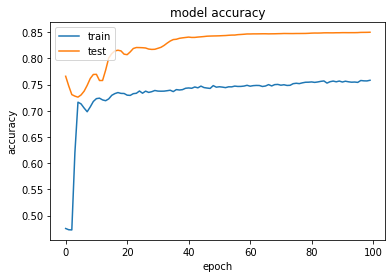

In [6]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()